In [1]:
from hfqco.calculator import nominal_ic, shunt_calc
print(nominal_ic(Ic=60.8*10**(-6), L=3.5*10**(-12)))


1.9175373305009014e-05


･ (Period to calculate initial phase)		=  1e-10  ~  4e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]
Simulate with default values.
Using default parameters


100%|██████████| 13/13 [00:36<00:00,  2.84s/it]


,low(value),low(%),high(value),high(%)
CLKL1,0.023438,-99.609375,12.000000,100.00000
R0,12.574219,-66.015625,74.000000,100.00000
BIAS,0.349609,-30.078125,0.734375,46.87500
SQUID6,0.002375,-99.609375,0.969000,59.37500
SQUID4,0.001906,-99.609375,0.789187,61.71875
L0,0.016406,-99.609375,8.400000,100.00000
L1,11.566406,-44.921875,42.000000,100.00000
CLKR1,9.960938,-66.796875,60.000000,100.00000
R1,15.187500,-36.718750,35.250000,46.87500
SQUID3,0.002492,-99.609375,0.727719,14.06250


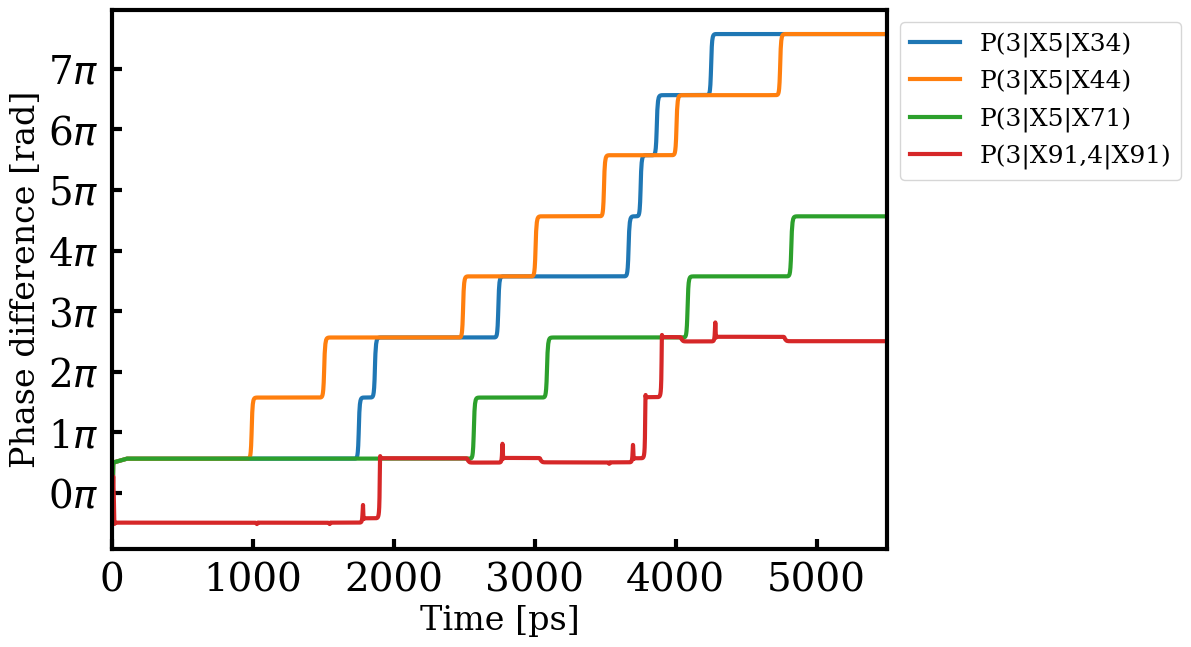

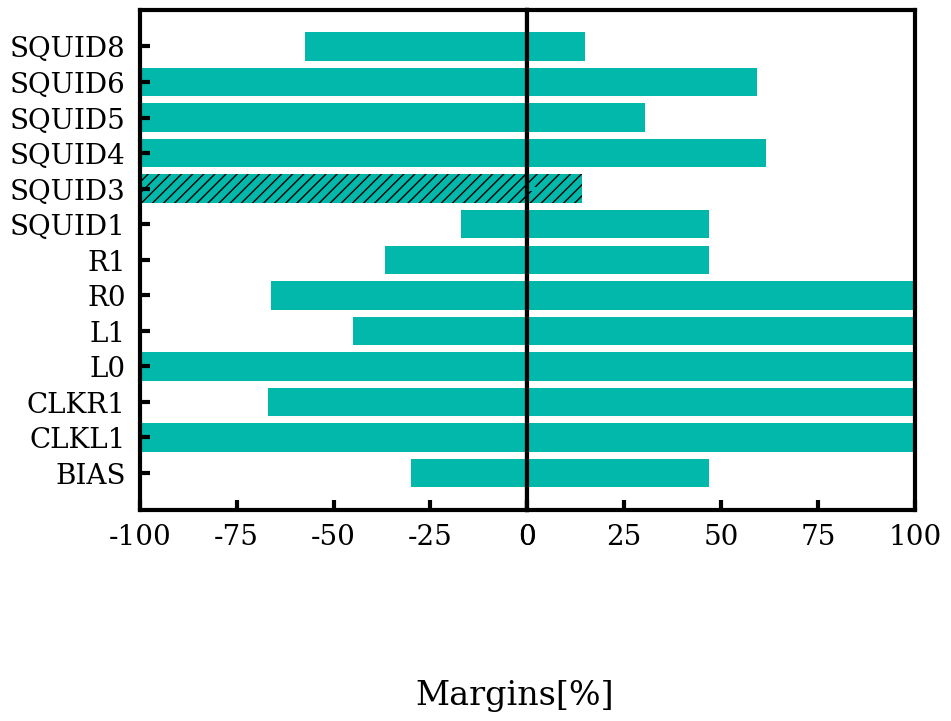

In [1]:
input = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

** + -------------------- +
** |     HFQJTL           |
** + -------------------- +
.subckt jtl_squid   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   20ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt jtl_base        1       5       100
L1                      1       2       1pH
L2                      2       3       4.2pH
L3                      3       4       8.4pH
L4                      4       5       3.2pH
X1      jtl_squid       3       0
X2      jtl_squid       4       0
R1                      2       100     34ohm
.ends

.subckt jtl_base8       1       9       100
X1      jtl_base        1       2       100
X2      jtl_base        2       3       100
X3      jtl_base        3       4       100
X4      jtl_base        4       5       100
X5      jtl_base        5       6       100
X6      jtl_base        6       7       100
X7      jtl_base        7       8       100
X8      jtl_base        8       9       100
.ends
** + ---------------------------------- +



** + -------------------- +
** |     EDFF               |
** + -------------------- +
.subckt dff_squid1   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID1(0.608)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID1(0.608)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid2   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=2
R1                  1       5   20ohm 
B2                  2       5   jjmod area=2
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid3   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID3(0.638)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID3(0.638)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid4   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID4(0.488)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID4(0.488)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid5   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID5(0.608)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID5(0.608)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid6   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID6(0.608)
R1                  1       5   20ohm Z
B2                  2       5   jjmod area=#SQUID6(0.608)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid7   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=2
R1                  1       5   20ohm 
B2                  2       5   jjmod area=2
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid8   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID8(0.638)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID8(0.638)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends


.subckt EDFF     1  21  10   100
L1                      1       2       1pH fcheck
R1                      2       100     #R0(37)ohm
L2                      2       3       #L0(4.2)pH fcheck
X1      dff_squid1      3       4
X2      dff_squid2      4       5
X3      dff_squid3      5       0
L3                      5       6       1pH fcheck
R2                      6       100     #R1(24)ohm
L4                      6       7       #L1(21)pH fcheck
L5                      7       8       1pH fcheck
X4      dff_squid4      8       0
L6                      8       9       8.4pH fcheck
X5      dff_squid5      9       0
L7                      9       10      3.2pH fcheck 

L21                     21      22      1pH fcheck
R3                      22      100     #CLKR1(30)ohm
L22                     22      23      4.2pH fcheck
X6      dff_squid6      23      0
L23                     23      24      4pH fcheck
X7      dff_squid7      24      25
X8      dff_squid8      25      26
L24                     26      7       #CLKL1(6)pH fcheck 
.ends
** + ---------------------------------- +



*** top cell: 

Vin1                        31      0       PWL(0ps 0mV   1510ps 0mV 1511ps 0.517mV 1512ps 0.517mV 1513ps 0mV   1610ps 0mV 1611ps 0.517mV 1612ps 0.517mV 1613ps 0mV   2500ps 0mV 2501ps 0.517mV 2502ps 0.517mV 2503ps 0mV   3410ps 0mV 3411ps 0.517mV 3412ps 0.517mV 3413ps 0mV   3510ps 0mV 3511ps 0.517mV 3512ps 0.517mV 3513ps 0mV   3610ps 0mV 3611ps 0.517mV 3612ps 0.517mV 3613ps 0mV   4010ps 0mV 4011ps 0.517mV 4012ps 0.517mV 4013ps 0mV)
R31                         31      32                       1ohm
X31    jtl_base8            32      33      100
X32    jtl_base8            33      34      100
X33    jtl_base8            34      35      100
X34    jtl_base8            35      36      100


Vinclk                      41      0       PWL(0ps 0mV   750ps 0mV 751ps 0.517mV 752ps 0.517mV 753ps 0mV   1250ps 0mV 1251ps 0.517mV 1252ps 0.517mV 1253ps 0mV   2250ps 0mV 2251ps 0.517mV 2252ps 0.517mV 2253ps 0mV   2750ps 0mV 2751ps 0.517mV 2752ps 0.517mV 2753ps 0mV   3250ps 0mV 3251ps 0.517mV 3252ps 0.517mV 3253ps 0mV   3750ps 0mV 3751ps 0.517mV 3752ps 0.517mV 3753ps 0mV   4500ps 0mV 4501ps 0.517mV 4502ps 0.517mV 4503ps 0mV)
R41                         41      42                       1ohm
X41    jtl_base8            42      43      100
X42    jtl_base8            43      44      100
X43    jtl_base8            44      45      100
X44    jtl_base8            45      46      100


X91     EDFF                36  46  72  200


X71    jtl_base8            72      73      100
X72    jtl_base8            73      74      100
X73    jtl_base8            74      75      100
X74    jtl_base8            75      76      100
R72                         76      77                      8.32ohm
L71                         77      0                       2pH fcheck


Vb1                         100     0                       pwl(0ps 0mV 100ps 0.5mV)
Vb2                         200     0                       pwl(0ps 0mV 100ps #BIAS(0.5)mV)


*** jsim input file ***
.tran 1ps 5500ps 0ps 1ps

.print phase  3|X5|X34
.print phase  3|X5|X44

.print phase  3|X5|X71
.print nodep  3|X91 4|X91
.end
"""


config_data = {
    "avgcalc.start.time":100e-12,
    "avgcalc.end.time":400e-12,
    "pulse.delay":180e-12,
    "pulse.interval": 500e-12,
    "phase.ele": ["P(3|X5|X34)","P(3|X5|X44)","P(3|X5|X71)","P(3|X91,4|X91)"],
    "voltage.ele" : [],
    "allow.multi.swithes" : False
}

from hfqco import data, util, pyjosim, netlist

from hfqco.pyjosim import simulation
from hfqco.graph import sim_plot
import importlib
importlib.reload(data)
importlib.reload(util)
importlib.reload(netlist)



# df = simulation(input)
# sim_plot(df)

# inp_df = util.create_inp_df("CLKR1",30, 38, 2,"CLKL1", 2,8,1, "SQUID8", 0.638,0.728,0.03)
d = netlist.Netlist(input, config_data)
d.get_margins()
# d.custom_simulation(inp_df)
# inp_df.to_csv("dffe5.csv")

# d = data.Data(netlist_and, config_data)
# d.get_base_switch_timing()
# d.get_margins()